# Gráfico de Barras

Um gráfico de barras (*bar chart* ou *bar graph*) é um gráfico que apresenta dados categóricos com barras retangulares cujas alturas ou comprimentos são proporcionais aos valores que representam.

In [1]:
# Instalação das bibliotecas
!pip install pandas --quiet
!pip install seaborn --quiet

In [2]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Baixando a base de dados de medalhas olímpicas entre 1976 a 2008
url = 'http://www.key2stats.com/Summer_Olympics_Medals__1976-2008__1589_1.csv'
df = pd.read_csv(url, encoding='latin-1')
df.head()

,Unnamed: 0,X,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,1,1,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,2,2,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,3,3,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,4,4,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,5,5,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [4]:
# Removendo da tabela (pandas dataframe) a primeira e segunda colunas
df.drop(df.columns[[0,1]], axis=1, inplace=True)
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


Text(0.5, 1.0, 'Top 10 países com maior número de medatalhas')

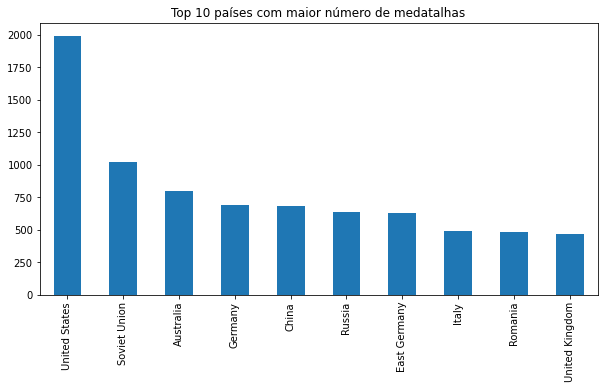

In [5]:
# Top 10 países com maior número de medatalhas (pandas plot)
df_top10 = df['Country'].value_counts()[:10] # or .head(10)
#print(df_top10)
df_top10.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 países com maior número de medatalhas')

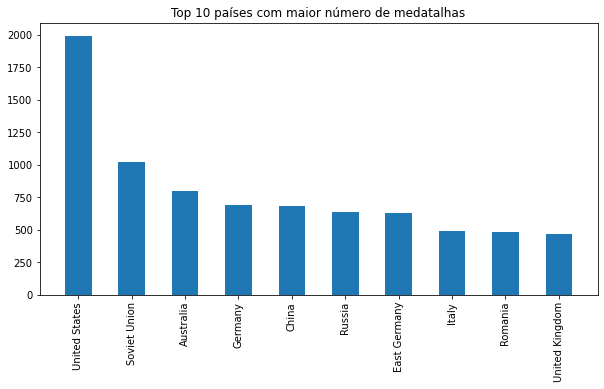

In [6]:
# Top 10 países com maior número de medatalhas (matplotlib)
plt.figure(figsize = (10,5))
plt.bar(df_top10.index, df_top10.values, width=0.5)
plt.title("Top 10 países com maior número de medatalhas")
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Número de Medalhas')

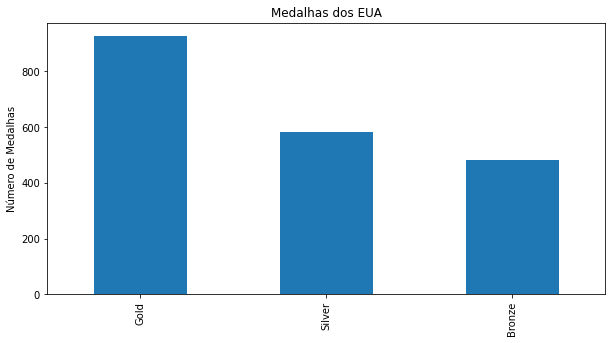

In [7]:
# Medalhas dos EUA
df_medals_usa = df[df['Country']=='United States']['Medal'].value_counts()
#print(df_medals_usa)
df_medals_usa.plot(kind='bar', figsize=(10,5))
plt.title('Medalhas dos EUA')
plt.ylabel('Número de Medalhas')

Text(0, 0.5, 'Número de Medalhas')

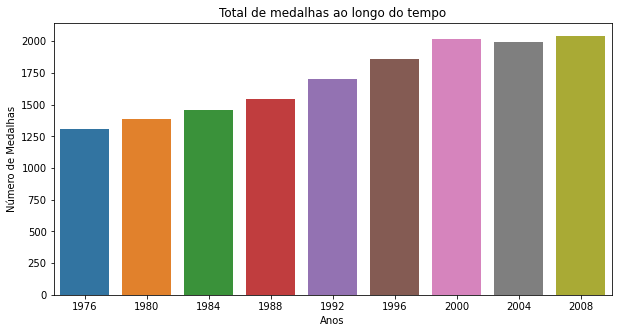

In [8]:
# Total de medalhas ao longo do tempo
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Year'])
plt.title('Total de medalhas ao longo do tempo')
plt.xlabel('Anos')
plt.ylabel('Número de Medalhas')

Text(0, 0.5, 'Nome do Atleta')

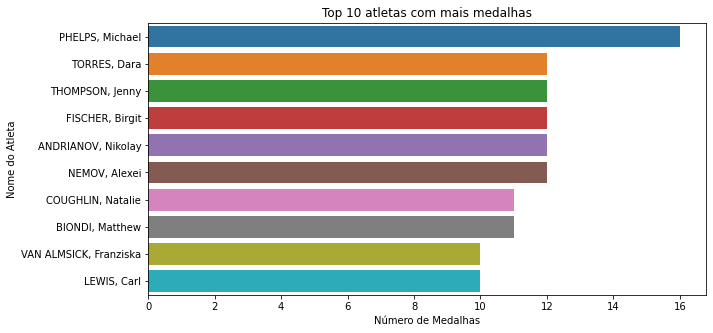

In [9]:
# Top 10 atletas com mais medalhas
athlete_order = df['Athlete'].value_counts().head(10).index
#print(df['Athlete'].value_counts().head(10))
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Athlete', order=athlete_order)
plt.title('Top 10 atletas com mais medalhas')
plt.xlabel('Número de Medalhas')
plt.ylabel('Nome do Atleta')

Text(0, 0.5, 'Número de Medalhas')

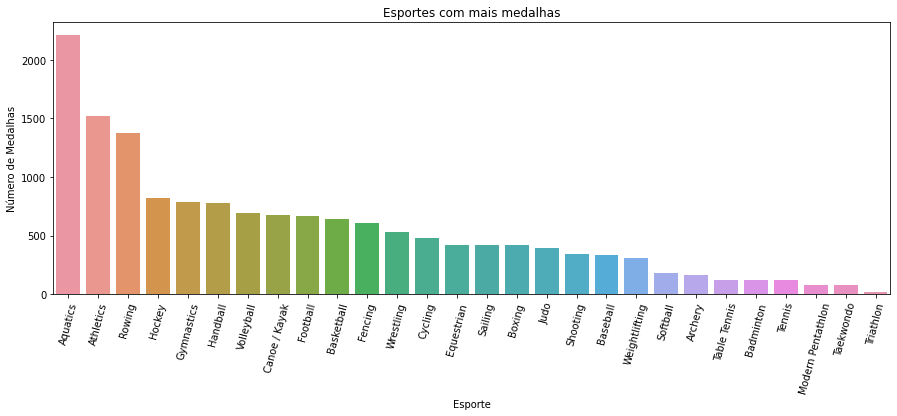

In [10]:
# Esportes com mais medalhas
plt.figure(figsize=(15, 5))
highest_sport = df['Sport'].value_counts().index
#print(df['Sport'].value_counts())
sns.countplot(data=df, x='Sport', order=highest_sport)
plt.xticks(rotation=75)
plt.title('Esportes com mais medalhas')
plt.xlabel('Esporte')
plt.ylabel('Número de Medalhas')

Text(0, 0.5, 'Número de Medalhas')

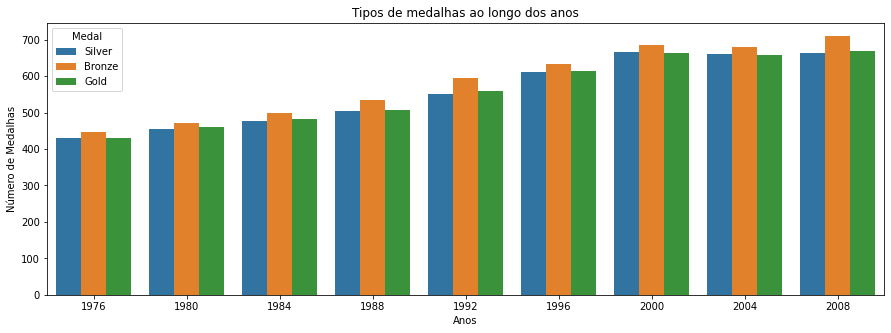

In [11]:
# Tipos de medalhas ao longo dos anos
plt.figure(figsize=(15, 5))
sns.countplot(x='Year', hue='Medal', data=df)
plt.title("Tipos de medalhas ao longo dos anos")
plt.xlabel('Anos')
plt.ylabel('Número de Medalhas')

Text(0, 0.5, 'Número de Medalhas')

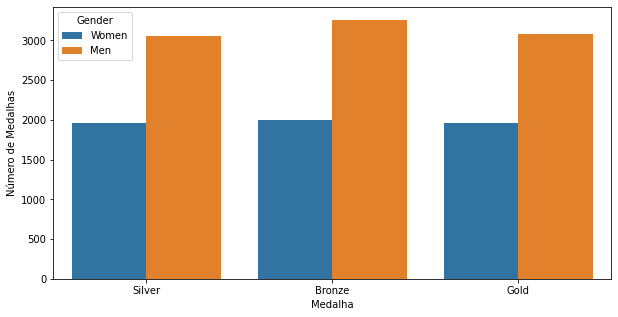

In [12]:
# Medalhas por gênero
plt.figure(figsize=(10, 5))
sns.countplot(x="Medal", hue="Gender", data=df)
plt.xlabel('Medalha')
plt.ylabel('Número de Medalhas')

Text(0, 0.5, 'Ano')

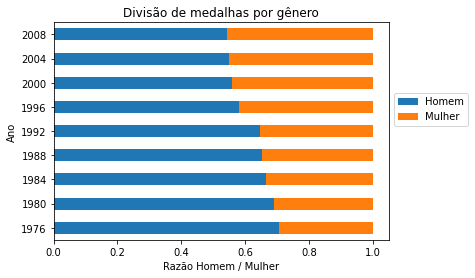

In [13]:
# Divisão de medalhas por gênero
gender_group = df.groupby(['Year', 'Gender']).size().unstack()
#print(gender_group)
gender_group.apply(lambda x:x/x.sum(), axis='columns').plot(kind='barh', stacked=True, legend=False)
#print(gender_group.apply(lambda x:x/x.sum(), axis='columns'))
plt.legend(['Homem', 'Mulher'], bbox_to_anchor=(1.0, 0.7))
plt.title('Divisão de medalhas por gênero')
plt.xlabel('Razão Homem / Mulher')
plt.ylabel('Ano')

Text(0, 0.5, 'Esporte')

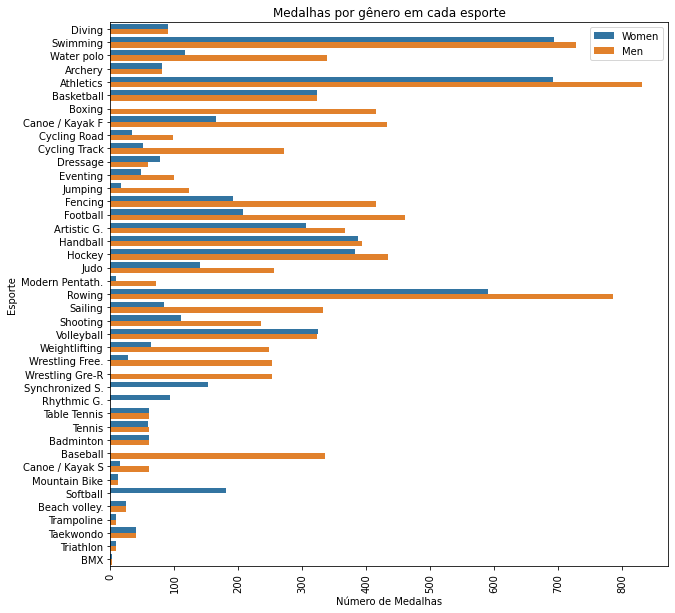

In [14]:
# Medalhas por gênero em cada esporte
plt.figure(figsize=(10, 10))
sns.countplot(y='Discipline',hue='Gender',data=df)
plt.xticks(rotation=90)
plt.title('Medalhas por gênero em cada esporte')
plt.legend(loc=1)  # 1 é a posição superior direita
plt.xlabel('Número de Medalhas')
plt.ylabel('Esporte')

# Autor

<a href="https://www.youtube.com/channel/UCa-d0hwYHOu6ehwc_oMjOoA" target="_blank">Alcides Lino (canal Programação e Liberdade)</a>

---

# Registro de Alterações (*Change Log*)

| Data (DD/MM/YYYY) | Versão  | Alterado Por | Descrição da Mudança                |
| ----------------- | ------- | ------------ | ----------------------------------- |
| 20/03/2022        | 1.0     | Alcides      | Versão inicial                      |